In [173]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import stemgraphic

# Ejemplo 1

**Pasas**. El número de pasas en cada una de 14 minicajas (tamaño de 1/2 onza) se contó para una marca genérica y pasas de la marca Sunmaid. Aquí vemos los dos conjuntos de datos:

|Marca genérica|Sunmaid|
|---|---|
|25 |25 | 
|26 |29 |
|25 |24 |
|28 |24 | 
|26 |28 | 
|28 |24 |
|28 |28 |
|27 |22 | 
|26 |25 |
|27 |28 | 
|24 |30 |
|25 |27 |
|26 |28 | 
|26 |24 |

1. ¿Cuáles son la media y desviación estándar para la marca genérica?
2. ¿Cuáles son la media y desviación estándar para la marca Sunmaid?
3. Encuentre la mediana, los cuartiles superior e inferior y el IQR para cada uno de los dos conjuntos de datos.
4. Construya dos gráficas de caja en la misma escala horizontal para comparar los dos conjuntos de datos.

In [174]:
#Create a Dictionary of series
data = {'Marca':pd.Series(14*['Generica'] + 14*['Sunmaid']),
        'Pasas por caja': pd.Series([25, 26, 25, 28, 26, 28, 28, 27, 26, 27, 24, 25, 26, 26, 
                                     25, 29, 24, 24, 28, 24, 28, 22, 25, 28, 30, 27, 28, 24])
}

#Create a DataFrame
df = pd.DataFrame(data)
df.head()

,Marca,Pasas por caja
0,Generica,25
1,Generica,26
2,Generica,25
3,Generica,28
4,Generica,26


In [175]:
df.columns

Index(['Marca', 'Pasas por caja'], dtype='object')

In [176]:
df.shape

(28, 2)

In [177]:
# Information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Marca           28 non-null     object
 1   Pasas por caja  28 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 576.0+ bytes


Se obtienen dos dataframes separados para cada marca:

In [178]:
# Separamos los dados de cada marcas
df_generica = pd.DataFrame(df[df['Marca']== 'Generica']['Pasas por caja'],columns=['Pasas por caja'])
df_sunmaid = pd.DataFrame(df[df['Marca']== 'Sunmaid']['Pasas por caja'],columns=['Pasas por caja'])

In [179]:
# Ta
df_generica

,Pasas por caja
0,25
1,26
2,25
3,28
4,26
5,28
6,28
7,27
8,26
9,27


In [180]:
df_sunmaid = df_sunmaid.reset_index(drop=True)
df_sunmaid

,Pasas por caja
0,25
1,29
2,24
3,24
4,28
5,24
6,28
7,22
8,25
9,28


### Punto 1 ###
Media y desviación estándar para la marca genérica

In [181]:
# Media
media_generica = df_generica.mean()[0]
# desviacion estandar
std_generica = df_generica.std()[0]

print("Marca generica")
print("- Media: {0:.4f}".format(media_generica))
print("- Desviacion estandar: {0:.4f}".format(std_generica))

Marca generica
- Media: 26.2143
- Desviacion estandar: 1.2514


### Punto 2

Media y desviación estándar para la marca sunmaid

In [182]:
# Media
media_sunmaid = df_sunmaid.mean()[0]
# desviacion estandar
std_sunmaid = df_sunmaid.std()[0]

print("Marca sunmaid")
print("- Media: {0:.4f}".format(media_sunmaid))
print("- Desviacion estandar: {0:.4f}".format(std_sunmaid))

Marca sunmaid
- Media: 26.1429
- Desviacion estandar: 2.4133


### Punto 3

Encuentre la mediana, los cuartiles superior e inferior y el IQR para cada uno de los dos conjuntos de datos.

El **resumen de cinco números** consta del número más pequeño, el cuartil inferior, le mediana, el cuartil superior, y el número más grande, presentados en orden de menor a mayor:

$$Min \:\:\: Q_1 \:\:\: Mediana \:\:\: Q_3 \:\:\: Max$$

#### Marca generica

In [183]:
# Resumen marca generica

# Mediana
mediana_generica = df_generica.median()[0]

# Rango
min_generica = df_generica.min()[0] # df_generica.quantile(q = 0)[0]
max_generica = df_generica.max()[0] # df_generica.quantile(q = 1)[0]
rango_generica = df_generica.max()[0] - df_generica.min()[0] 

# Cuartiles
Q1_generica = df_generica.quantile(q = .25)[0]
Q3_generica = df_generica.quantile(q = .75)[0]
IQR_generica = Q3_generica - Q1_generica

print("Marca generica")
print("- Rango [{0:d},{1:d}]: {2:d}".format(min_generica, max_generica, rango_generica))
print("- Mediana: {0:.4f}".format(mediana_generica))
print("- Min: {0:.4f}".format(min_generica))
print("- Q1 (0.25): {0:.4f}".format(Q1_generica))
print("- Q2 (0.5): {0:.4f}".format(mediana_generica))
print("- Q3 (0.75): {0:.4f}".format(Q3_generica))
print("- Max: {0:.4f}".format(max_generica))
print("- IRQ: {0:.4f}".format(IQR_generica))

Marca generica
- Rango [24,28]: 4
- Mediana: 26.0000
- Min: 24.0000
- Q1 (0.25): 25.2500
- Q2 (0.5): 26.0000
- Q3 (0.75): 27.0000
- Max: 28.0000
- IRQ: 1.7500


In [184]:
# Con un solo comando
df_generica.describe()

,Pasas por caja
count,14.000000
mean,26.214286
std,1.251373
min,24.000000
25%,25.250000
50%,26.000000
75%,27.000000
max,28.000000


#### Marca sunmaid

In [185]:
# Resumen marca sunmaid

# Mediana
mediana_sunmaid = df_generica.median()[0]

# Rango
min_sunmaid = df_sunmaid.min()[0] # df_generica.quantile(q = 0)[0]
max_sunmaid = df_sunmaid.max()[0] # df_generica.quantile(q = 1)[0]
rango_sunmaid = max_sunmaid - min_sunmaid

# Cuartiles
Q1_sunmaid = df_sunmaid.quantile(q = .25)[0]
Q3_sunmaid = df_sunmaid.quantile(q = .75)[0]
IQR_sunmaid = Q3_sunmaid - Q1_sunmaid

print("Marca sunmaid")
print("- Rango [{0:d},{1:d}]: {2:d}".format(min_sunmaid, max_sunmaid, rango_sunmaid))
print("- Mediana: {0:.4f}".format(mediana_sunmaid))
print("- Min: {0:.4f}".format(min_sunmaid))
print("- Q1 (0.25): {0:.4f}".format(Q1_sunmaid))
print("- Q2 (0.5): {0:.4f}".format(mediana_sunmaid))
print("- Q3 (0.75): {0:.4f}".format(Q3_sunmaid))
print("- Max: {0:.4f}".format(max_sunmaid))
print("- IRQ: {0:.4f}".format(IQR_sunmaid))

Marca sunmaid
- Rango [22,30]: 8
- Mediana: 26.0000
- Min: 22.0000
- Q1 (0.25): 24.0000
- Q2 (0.5): 26.0000
- Q3 (0.75): 28.0000
- Max: 30.0000
- IRQ: 4.0000


In [186]:
# Con un solo comando
df_sunmaid.describe()

,Pasas por caja
count,14.000000
mean,26.142857
std,2.413333
min,22.000000
25%,24.000000
50%,26.000000
75%,28.000000
max,30.000000


### Punto 4
Construya dos gráficas de caja en la misma escala horizontal para comparar los dos conjuntos de datos.

#### Diagrama de caja de la marca generica

Text(0.5, 1.0, 'Diagrama de cajas de la marca generica')

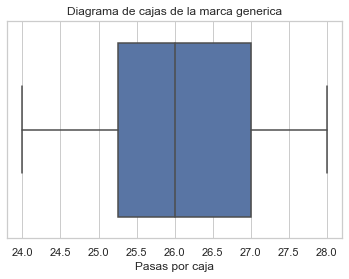

In [187]:
ax_generica = sns.boxplot(x=df_generica['Pasas por caja'])
ax_generica.set_title('Diagrama de cajas de la marca generica')

#### Diagrama de caja de la marca Sunmaid

{'whiskers': [<matplotlib.lines.Line2D at 0x2b73b4615b0>,
 'caps': [<matplotlib.lines.Line2D at 0x2b73b461b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b73b454160>],
 'medians': [<matplotlib.lines.Line2D at 0x2b73b46e130>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b73b46e400>],
 'means': []}

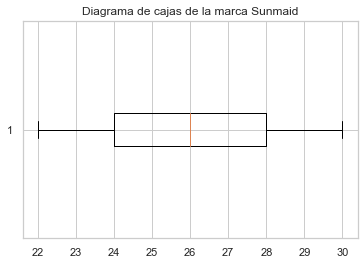

In [188]:
fig_sunmaid, ax_sunmaid = plt.subplots()
ax_sunmaid.set_title('Diagrama de cajas de la marca Sunmaid')
ax_sunmaid.boxplot(df_sunmaid['Pasas por caja'], vert=False)

Text(0.5, 1.0, 'Diagrama de cajas')

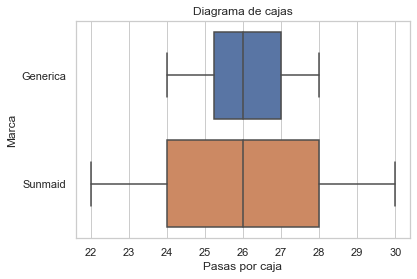

In [189]:
sns.set_theme(style="whitegrid")
ax_generica = sns.boxplot(x=df['Pasas por caja'],y=df['Marca'])
ax_generica.set_title('Diagrama de cajas')

# Ejemplo 2

Transductores de temperatura de cierto tipo se envían en lotes de 50. Se seleccionó una muestra de 60 lotes y se determinó el número de transductores en cada lote que no cumplen con las especificaciones de diseño y se obtuvieron los datos siguientes:

```
2 1 2 4 0 1 3 2 0 5 3 3 1 3 2 4 7 0 2 3
0 4 2 1 3 1 1 3 4 1 2 3 2 2 8 4 5 1 3 1
5 0 2 3 2 1 0 6 4 2 1 6 0 3 3 3 6 1 2 3
```

1. Determine las frecuencias y las frecuencias relativas de los valores observados de x = número de transductores en un lote que no cumplen con las especificaciones.
2. ¿Qué proporción de lotes muestreados tienen a lo sumo cinco transductores que no cumplen con las especificaciones? ¿Qué proporción tienen menos de cinco? ¿Qué proporción tienen por lo menos cinco unidades que no cumplen con las especificaciones?
3. Trace un histograma de los datos con la frecuencia relativa en la escala vertical y comente sus características.
4. Construya la grafica de caja.

Antes de iniciar a solucionar el problema, es bueno conocer información relevante sobre los tipos de datos.

In [190]:
#Create a Dictionary of series
data = {'# no cumple': pd.Series([2, 1, 2, 4, 0, 1, 3, 2, 0, 5, 3, 3, 1, 3, 2, 4, 7, 0, 2, 3, 
                                  0, 4, 2, 1, 3, 1, 1, 3, 4, 1, 2, 3, 2, 2, 8, 4, 5, 1, 3, 1,
                                  5, 0, 2, 3, 2, 1, 0, 6, 4, 2, 1, 6, 0, 3, 3, 3, 6, 1, 2, 3])
}

#Create a DataFrame
df = pd.DataFrame(data)
df.head()

,# no cumple
0,2
1,1
2,2
3,4
4,0


* **Medidas estadisticas**:

In [191]:
df.describe()

,# no cumple
count,60.000000
mean,2.533333
std,1.826979
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,8.000000


* **Tamano**:

df.shape

In [192]:
df.dtypes

# no cumple    int64
dtype: object

### Punto 1 
Determine las frecuencias y las frecuencias relativas de los valores observados de x = número de transductores en un lote que no cumplen con las especificaciones.

* **Tabla de frecuencias**:

In [193]:
freq = df.value_counts().sort_index()
freq = freq.sort_index()
freq

# no cumple
0               7
1              12
2              13
3              14
4               6
5               3
6               3
7               1
8               1
dtype: int64

* **Tabla de frecuencias relativas**:

In [194]:
freq_rel = df.value_counts()/df.shape[0]
freq_rel

# no cumple
3              0.233333
2              0.216667
1              0.200000
0              0.116667
4              0.100000
5              0.050000
6              0.050000
7              0.016667
8              0.016667
dtype: float64

In [195]:
type(freq_rel)
freq_rel.tolist()
freq_info = { 'Frecuencia': freq, 'Frec. Relativa': freq_rel }
df_freq = pd.DataFrame(freq_info)
df_freq

,Frecuencia,Frec. Relativa
# no cumple,,
0,7,0.116667
1,12,0.200000
2,13,0.216667
3,14,0.233333
4,6,0.100000
5,3,0.050000
6,3,0.050000
7,1,0.016667
8,1,0.016667


### Punto 2
¿Qué proporción de lotes muestreados tienen a lo sumo cinco transductores que no cumplen con las especificaciones? ¿Qué proporción tienen menos de cinco? ¿Qué proporción tienen por lo menos cinco unidades que no cumplen con las especificaciones?

* ¿Qué proporción de lotes muestreados tienen a lo sumo cinco transductores que no cumplen con las especificaciones? $x \leq 5$

In [196]:
freq_rel.iloc[0:6].sum()

0.9166666666666667

* ¿Qué proporción tienen menos de cinco? $x < 5$

In [197]:
freq_rel.iloc[0:5].sum()

0.8666666666666667

* ¿Qué proporción tienen por lo menos cinco unidades que no cumplen con las especificaciones? $x \geq 5$

In [198]:
freq_rel.iloc[5:].sum() # 1 - freq_rel.iloc[0:5].sum()

0.13333333333333333

### Punto 3

Trace un histograma de los datos con la frecuencia relativa en la escala vertical y comente sus características.

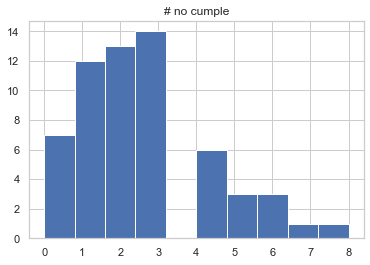

In [212]:
df.hist(); # No es muy claro

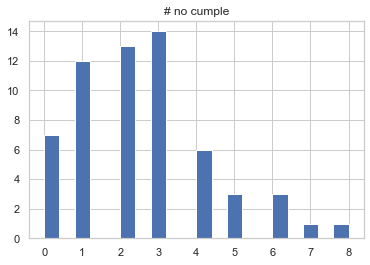

In [211]:
df.hist(bins=20);

### Punto 4
Construya la grafica de caja.

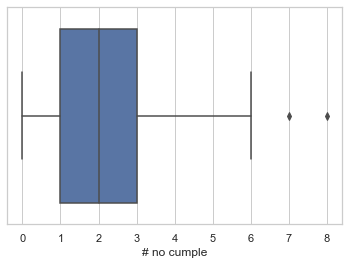

In [201]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df['# no cumple'])

### Resumen resultados

In [208]:
df.describe()

,# no cumple
count,60.000000
mean,2.533333
std,1.826979
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,8.000000


C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



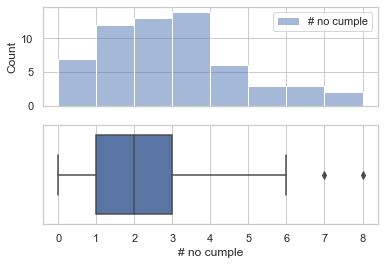

In [209]:
f, (ax_hist, ax_box) = plt.subplots(2, sharex=True)
sns.histplot(df, ax=ax_hist);
sns.boxplot(df['# no cumple'], ax=ax_box);

## Actividad

**Edades de monedas de un centavo**. A continuación aparecen edades de 50 monedas de un
centavo del ejercicio 1.45 y el conjunto de datos. Los datos se han ordenado de menor a mayor:

```
0 0 0 0 0 0 0 0 0 0
0 0 1 1 1 1 1 1 2 2
2 3 3 3 4 4 5 5 5 5
6 8 9 9 10 16 17 17 19 19
19 20 20 21 22 23 25 25 28 36
```

1. ¿Cuál es la edad promedio de los centavos?
2. ¿Cuál es la edad mediana de los centavos?
3. Construya una gráfica de caja para el conjunto de datos. 

## Referencias

1. https://www.earthdatascience.org/courses/intro-to-earth-data-science/scientific-data-structures-python/pandas-dataframes/run-calculations-summary-statistics-pandas-dataframes/
2. https://github.com/fonnesbeck/statistical-analysis-python-tutorial/blob/master/1.%20Introduction%20to%20Pandas.ipynb
3. https://github.com/dshahid380/Data-analysis-with-pandas
4. https://github.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition
5. https://www.statology.org/summary-statistics-pandas/
6. https://datatofish.com/descriptive-statistics-pandas/
7. https://www.tutorialspoint.com/python_pandas/python_pandas_descriptive_statistics.htm
8. https://www.cs.utah.edu/~jeffp/teaching/cs3130.html
9. https://github.com/awesomedata/awesome-public-datasets
10. https://github.com/dmbates/Devore6
11. https://cran.r-project.org/web/packages/Devore7/index.html
12. https://github.com/pachocamacho1990?tab=repositories
13. https://platzi.com/blog/pandas/
14. https://deepnote.com/@anthonymanotoa/Apuntes-de-Estadistica-Descriptiva-cfa882b6-c07f-43fe-9901-1c2e471ce120
15. https://platzi.com/blog/deepnote/